# Summarize Text
[Summarize Text Langchain Docs](https://python.langchain.com/v0.2/docs/tutorials/summarization/)

In [8]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("GROQ_API_KEY")

In [9]:
!pip install langchain langchain-groq

In [10]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="Gemma-7b-It", api_key = secret_value_0)
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7dab99d73d00>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7dab99d1f730>, model_name='Gemma-7b-It', groq_api_key=SecretStr('**********'))

# Method 1

In [12]:
from langchain.schema import HumanMessage, SystemMessage, AIMessage

In [18]:
speech = """
Swami Vivekananda knew everything about India like the palm of his hand.  What was the source and basis of his knowledge?  
He was a keen student of history and had a thorough knowledge of India’s glorious past.  
He was immensely practical in his outlook and that helped him understand the then condition of our country.  
After the passing away of his Guru and mentor, Sri Ramakrishna, he had gone on a pilgrimage of the entire country on foot.  
He met people from every segment of the society, from the richest to the poorest, from the most learned to the most ignorant, 
from high caste priests to those condemned as the low caste, from Maharajas to penniless beggars.  
The firsthand knowledge which he gained through his explorations gave him a complete understanding of our country including the causes for its downfall.  
Being a visionary and endowed with an extraordinary intellect and even a more feeling heart, he could find out the cure for India’s 
maladies and for restoring her to her former glory.  He predicted that India’s future glory would far surpass her past glory.  
He felt deeply concerned and pained by the degradation of our country.  He said, “If there are holes in this national ship, 
this society of ours, we are its children, let us go and stop the holes. Let us gladly do it with our hearts' blood; and if we cannot, 
then let us die. We will make a plug of our brains and put them into the ship, but condemn it never.”  
After a stay of four years in the West, during which he achieved extraordinary fame and recognition and was virtually lionized 
by the society; when he was about to depart for India, a Westerner asked him how he was feeling about returning to his motherland.  
In reply he said, “India I loved before I came away.  
Now the very dust of India has become holy to me, the very air is now to me holy; it is now the holy land, the place of pilgrimage, 
the Tirtha." 

Swami Vivekananda clearly identified the causes for our downfall, one of which was the neglect of the masses which he labeled as the 
great national sin.  
He said, “The poor, the low, the sinner in India have no friends, no help – they cannot rise, try however they may.  
They sink lower and lower every day, they feel the blows showered upon them by a cruel society, and they do not know whence the blow comes.”  
He said that millions were oppressed in the name of religion and one of the chief causes of India’s ruin was the monopoly of 
education by a few belonging to the privileged classes. 

Swami Vivekananda said that the whole difference between the West and the East is in that, they are nations i.e. civilizations, 
whereas we are not.  
While the higher classes in India and the West are the same, but there is infinite distance between the lower classes of these 
countries.  He lamented that for centuries people had been taught theories of degradation and have been told that they were nothing.  
The masses have been repeatedly told that they are not human beings and frightened for centuries till that they have become animals.  
Laziness, lack of energy, want of sympathy and appreciation for others were at the root of all miseries and that they should be given up. 
"""

In [19]:
chat_message = [
    SystemMessage(content = "You are a expert with expertise in summarizing speech"),
    HumanMessage(content = "Please provide short and concise summary of the following speech :\n Text: {speech}")
]

In [20]:
llm.get_num_tokens(speech)

766

In [27]:
llm.invoke(speech).content

"**Sources of Swami Vivekananda's Knowledge about India:**\n\n* **Firsthand experiences:**\n    * Pilgrimage throughout India on foot, interacting with people from all segments of society.\n    * Personal interactions with people from diverse backgrounds, including the rich, poor, learned, and ignorant.\n\n\n* **Historical knowledge:**\n    * Deep understanding of India's glorious past.\n\n\n* **Practical outlook:**\n    * Ability to analyze and understand the current state of the country.\n\n\n* **Spiritual and philosophical insights:**\n    * His spiritual practices and connection to his Guru, Sri Ramakrishna, provided him with a deeper understanding of the nation and its people.\n\n\n* **Personal reflection and intuition:**\n    * His extraordinary intellect and heartfelt concern for India allowed him to draw meaningful conclusions and predictions."

# Method 2. Prompt Template Text Summarization

In [28]:
from langchain.chains import LLMChain
from langchain import PromptTemplate

generic_temp = """
Write a summary of the following speech:
Speech:{speech}
Translate the precise summary to {language}
"""
prompt = PromptTemplate(
    input_variables = ["speech", "language"],
    template = generic_temp
)
prompt

PromptTemplate(input_variables=['language', 'speech'], template='\nWrite a summary of the following speech:\nSpeech:{speech}\nTranslate the precise summary to {language}\n')

In [30]:
complete_prompt = prompt.format(speech = speech, language = "Hindi")
complete_prompt

'\nWrite a summary of the following speech:\nSpeech:\nSwami Vivekananda knew everything about India like the palm of his hand.  What was the source and basis of his knowledge?  \nHe was a keen student of history and had a thorough knowledge of India’s glorious past.  \nHe was immensely practical in his outlook and that helped him understand the then condition of our country.  \nAfter the passing away of his Guru and mentor, Sri Ramakrishna, he had gone on a pilgrimage of the entire country on foot.  \nHe met people from every segment of the society, from the richest to the poorest, from the most learned to the most ignorant, \nfrom high caste priests to those condemned as the low caste, from Maharajas to penniless beggars.  \nThe firsthand knowledge which he gained through his explorations gave him a complete understanding of our country including the causes for its downfall.  \nBeing a visionary and endowed with an extraordinary intellect and even a more feeling heart, he could find o

In [31]:
llm.get_num_tokens(complete_prompt)

788

In [33]:
llm_chain = LLMChain(llm = llm, prompt = prompt)
summary = llm_chain.invoke({"speech":speech, "language":"Hindi"})
summary["text"]

'**संक्षेप:**\n\nस्वामी विवेकानंदा भारत के बारे में सभी बातें जानते थे, जैसे पलम की तरह। उनका ज्ञान इतिहास का गहरी समझ और भारत के गlorious भूतकालीन के धारदार जानकारी से था। उनका दृष्टिकोण व्यावहारिक था, जो उन्हें उस समय की स्थिति को समझने में मदद किया। गुरु रमाकृष्ण के निधन के बाद, वे पूरे देश पर पैदल यात्रा पर गए और समाज के विभिन्न हिस्सों से लोग से मिलते रहे, समृद्ध से गरीब, शिक्षित से अशिक्षित, उच्च जाति के पादरी से निम्न जाति के लोग, महाराजाओं से गरीब बेगारों तक। वे firsthand जानकारी, उन्हें देश के कारणों को समझने में मदद किया। वे भारत के भविष्य की गlorious को उसका पिछला गlorious से भी बड़ा होने का अनुमान करते थे। वे अपने देश के गिरावट के लिए गहरी कलन और पीड़िन महसूस करते थे।\n\n**तुल्य अनुवाद:**\n\nस्वामी विवेकानंदा के अनुसार, भारत के पतन के कुछ कारणों में जनसंख्या की उपेक्षा शामिल है, जिसे वे बड़े राष्ट्रीय पाप के रूप में बताते हैं। वे बताते हैं कि भारत के गरीब, निचले और अपासी लोग किसी भी मदद या सहायता से वंचित हैं। वे बताते हैं कि कई लोग धर्म के नाम पर दबोस में हैं। वे बताते हैं

In [34]:
summary = llm_chain.invoke({"speech":speech, "language":"English"})
summary["text"]

"## Summary:\n\nSwami Vivekananda, deeply knowledgeable about India, attributed his vast understanding to his extensive travels throughout the country after his Guru's passing. He interacted with people from all segments of society, witnessing firsthand the suffering and marginalization faced by the masses. His vision and intellect led him to diagnose the root causes of India's downfall, highlighting the neglect of the masses and the monopoly of education as crucial factors.\n\nVivekananda emphasized the urgent need to address these issues. He believed in the immense potential of the nation and predicted a future surpassing its glorious past. He expressed profound patriotism, declaring his love for his homeland and treating its soil and air as sacred.\n\nVivekananda challenged the social hierarchy, drawing a stark comparison between the West and the East. He criticized the West's focus on individual rights while neglecting collective responsibility. He lamented the centuries-long oppre

# Summarize Text strategies

In LangChain, "Stuff," "Map-Reduce," and "Refine" are different strategies used for summarizing text, particularly when dealing with large or complex documents. These methods define how the text is processed and summarized, each with its own advantages and disadvantages.

### Overview of Methods:

1. **Stuff:** 
   - All relevant text is "stuffed" into a single prompt and summarized at once.
2. **Map-Reduce:** 
   - The text is divided into smaller chunks ("map" phase), each chunk is summarized individually, and then those summaries are combined and summarized again ("reduce" phase).
3. **Refine:** 
   - The text is divided into chunks, and each chunk is summarized iteratively. The summary of each chunk is refined by considering previous summaries.
   
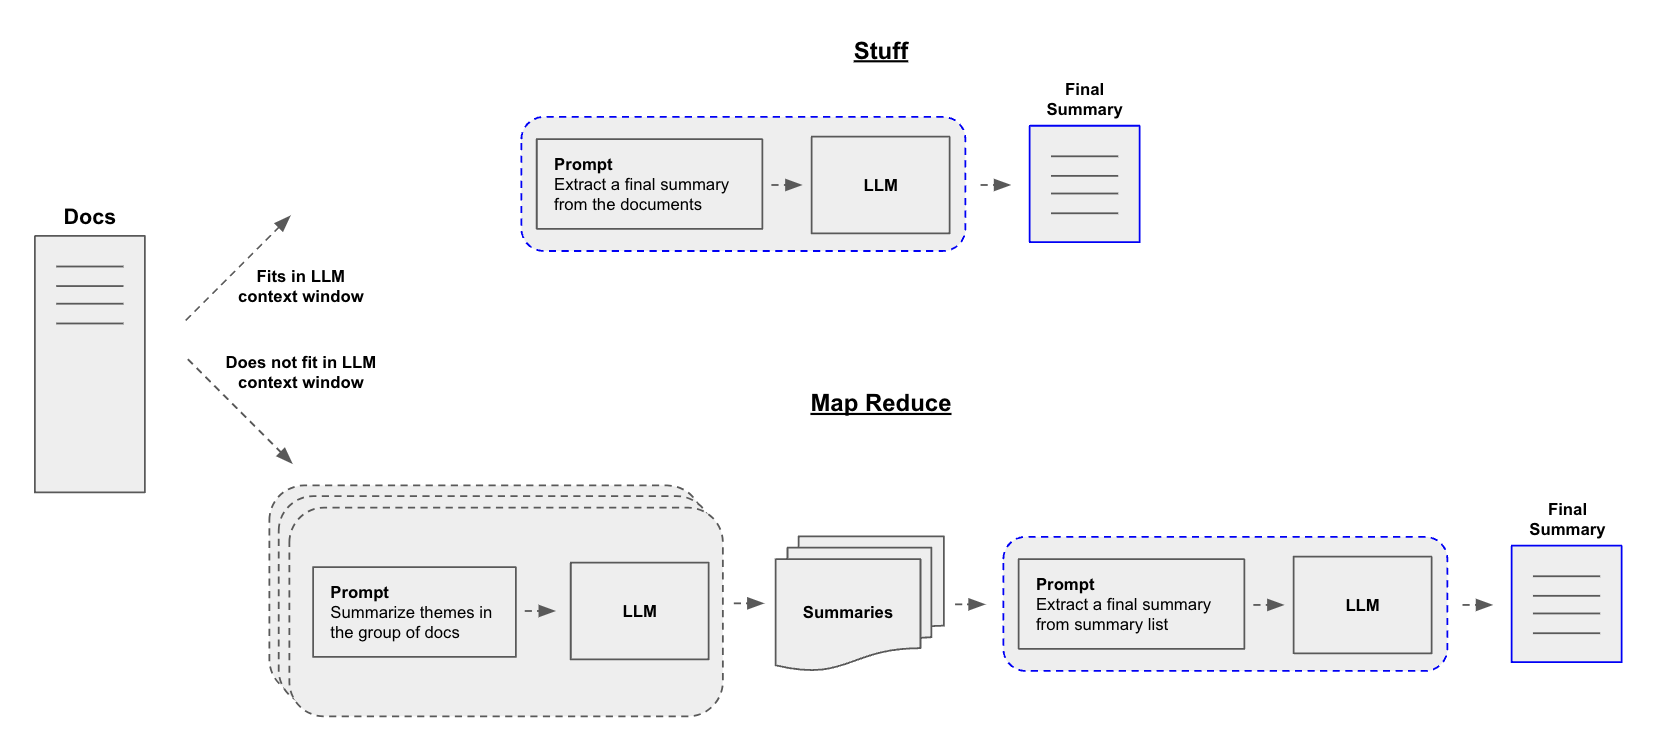

*[Image Source](https://python.langchain.com/v0.2/docs/tutorials/summarization/#overview)*

### Advantages and Disadvantages

| Method      | Advantages                                                                 | Disadvantages                                                                | When to Use                                                |
|-------------|-----------------------------------------------------------------------------|------------------------------------------------------------------------------|-------------------------------------------------------------|
| **Stuff**   | - Simple and straightforward.<br>- Works well with shorter texts.           | - Limited by model input length (e.g., token limits).<br>- Not scalable for long texts. | - Use when text is short enough to fit within the model’s input length. |
| **Map-Reduce** | - Scalable to longer documents.<br>- Summaries are often more accurate as each part is summarized individually.<br>- Handles large texts effectively. | - Can lose some context when splitting text.<br>- More computationally intensive.<br>- Risk of inconsistencies between mapped summaries. | - Use when dealing with large documents or when the text exceeds token limits. |
| **Refine**  | - Maintains context across chunks.<br>- Iterative process can lead to more coherent summaries.<br>- Effective for complex documents. | - Can be slower due to iterative refinement.<br>- Computationally expensive.<br>- Risk of overfitting or repetition. | - Use when the document is complex, and preserving context is crucial.<br>- Ideal when accuracy is more important than speed. |

### When to Use Each Method

1. **Stuff**:
   - **Use when:** The text is relatively short and can easily fit within the token limit of the model. This method is efficient and effective for small documents or passages where context loss is minimal.

2. **Map-Reduce**:
   - **Use when:** You're working with large texts that exceed the token limit of the model. This method is best when you need to summarize a large document or multiple documents, and you want to ensure that each part of the text is given attention.

3. **Refine**:
   - **Use when:** The text is complex and requires careful consideration of context throughout the document. This method is suitable when summarizing documents where the relationship between different sections is important, and you want to ensure that the final summary is cohesive.

### Example Use Cases

- **Stuff:** Summarizing a short blog post or article.
- **Map-Reduce:** Summarizing a book or a collection of research papers.
- **Refine:** Summarizing legal documents, contracts, or detailed reports where maintaining context and coherence is critical.

These methods provide flexibility in handling a wide range of summarization tasks, allowing you to choose the best approach based on the length and complexity of the text.

# Method 3. StuffDocumentChain Text Summarization

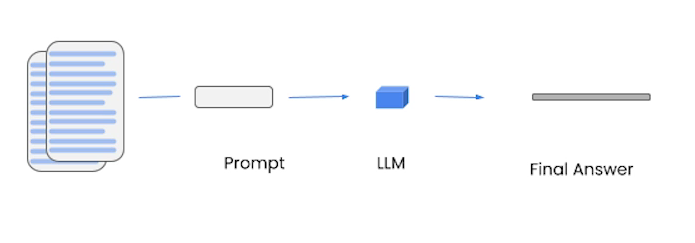

*[Image Source](https://ogre51.medium.com/types-of-chains-in-langchain-823c8878c2e9)*

When we use load_summarize_chain with chain_type="stuff", we will use the StuffDocumentsChain.

The chain will take a list of documents, insert them all into a prompt, and pass that prompt to an LLM

In [35]:
!pip install langchain-community

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.2 MB/s eta 0:00:0000:0100:01


In [37]:
from langchain_community.document_loaders import PyPDFLoader

docs = PyPDFLoader("/kaggle/input/apj-speech/apjspeech.pdf").load()

In [39]:
len(docs)

7

In [40]:
template = """
Write a concise and short summary  of the following speech
Speech: {text}
"""
prompt = PromptTemplate(
    input_variables = ["text"],
    template = template
)
prompt

PromptTemplate(input_variables=['text'], template='\nWrite a concise and short summary  of the following speech\nSpeech: {text}\n')

In [41]:
from langchain.chains.summarize import load_summarize_chain

chain = load_summarize_chain(llm, chain_type = "stuff", prompt= prompt, verbose = True)
chain

StuffDocumentsChain(verbose=True, llm_chain=LLMChain(verbose=True, prompt=PromptTemplate(input_variables=['text'], template='\nWrite a concise and short summary  of the following speech\nSpeech: {text}\n'), llm=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7dab99d73d00>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7dab99d1f730>, model_name='Gemma-7b-It', groq_api_key=SecretStr('**********'))), document_variable_name='text')

In [42]:
output_summary = chain.invoke(docs)
output_summary



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

Write a concise and short summary  of the following speech
Speech: A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online in

{'input_documents': [Document(metadata={'source': '/kaggle/input/apj-speech/apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences t

In [44]:
output_summary["output_text"]

"## Summary of A P J Abdul Kalam's Departing Speech\n\n**Theme:** Inspiring the nation to achieve the goal of a developed India by 2020.\n\n**Key Messages:**\n\n* **Empowerment of Villages:** Focus on empowering villages through infrastructure development, connectivity, and economic opportunities.\n* **Agriculture and Food Security:** Emphasis on boosting agricultural productivity and ensuring food security through improved farming practices.\n* **Overcoming Challenges:** Highlighting the importance of collective action and partnership in overcoming disasters and challenges.\n* **Connecting for Transformation:** Promoting the Pan African e-Network to enhance connectivity and facilitate societal transformation.\n* **Defending the Nation:** Recognizing the bravery and dedication of the Indian Armed Forces in safeguarding the nation.\n* **Youth Empowerment:** Inspiring the youth to embrace transformative initiatives like Lead India 2020 to create a better future.\n\n**Call to Action:**\n\

# Method 4. Map-Reduce Text Summarization

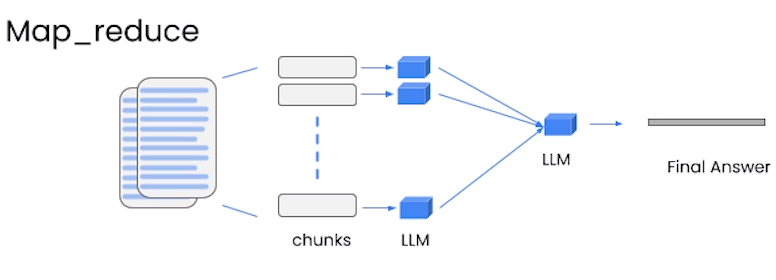

*[Image Source](https://ogre51.medium.com/types-of-chains-in-langchain-823c8878c2e9)*


In [46]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
document = RecursiveCharacterTextSplitter(chunk_size = 2000, chunk_overlap = 100).split_documents(docs)
document[0]

Document(metadata={'source': '/kaggle/input/apj-speech/apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, whi

In [48]:
document[7]

Document(metadata={'source': '/kaggle/input/apj-speech/apjspeech.pdf', 'page': 3}, page_content='Africa. This was attended by 53 member countries of the Africa n Union, where I \nproposed the concept of Pan African e-Network for providing seamless and integrated \nsatellite, fiber optics and wireless network connecting 53 African countries at an \nestimated cost of US $ 100 million. \n \nAs part of the project 12 universities (7 from India and 5 from Afri ca), 17 Super \nSpecialty Hospitals (12 from India and 5 from Africa), 53 tele-me dicine centers and 53 \ntele-education centres in Africa will be connected. The pilot proj ect on tele-education and \ntele-medicine in Ethiopia has already been commissioned. Indira Gandh i National Open \nUniversity has taken up the MBA Course for 34 Ethiopian students of Addis  Ababa and \nHarmaya Universities. As regards, tele-medicine, the special ists from CARE Hospital,')

In [49]:
len(document)

13

In [52]:
chunks_prompt = """
Please summarize the below speech:
Speech: {text}
Summary->
"""

map_prompt_template = PromptTemplate(
    input_variables = ["text"],
    template = chunks_prompt
)
map_prompt_template

PromptTemplate(input_variables=['text'], template='\nPlease summerize the below speech:\nSpeech: {text}\nSummary->\n')

In [53]:
final_prompt='''
Provide the final summary of the entire speech with these important points.
Add a Motivation Title,Start the precise summary with an introduction and provide the summary in number 
points for the speech.
Speech:{text}

'''
final_prompt_template=PromptTemplate(
    input_variables=['text'],
    template=final_prompt
)
final_prompt_template

PromptTemplate(input_variables=['text'], template='\nProvide the final summary of the entire speech with these important points.\nAdd a Motivation Title,Start the precise summary with an introduction and provide the summary in number \npoints for the speech.\nSpeech:{text}\n\n')

[load_summarize_chain docs](https://api.python.langchain.com/en/latest/chains/langchain.chains.summarize.chain.load_summarize_chain.html)

In [54]:
summary_chain = load_summarize_chain(
    llm = llm,
    chain_type = "map_reduce",
    map_prompt = map_prompt_template,
    combine_prompt = final_prompt_template,
    verbose = True
)

output = summary_chain.invoke(document)
output



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

Please summerize the below speech:
Speech: A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have m

Token indices sequence length is longer than the specified maximum sequence length for this model (2086 > 1024). Running this sequence through the model will result in indexing errors



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Provide the final summary of the entire speech with these important points.
Add a Motivation Title,Start the precise summary with an introduction and provide the summary in number 
points for the speech.
Speech:**Summary:**

Former President of India, A P J Abdul Kalam, reflects on his five-year tenure at Rashtrapati Bhavan. He expresses gratitude for the support of people from diverse backgrounds. Kalam outlines his key messages during his presidency:

**1. Accelerate Development:**
- Emphasis on empowering the youth to achieve a developed India by 2020.


**2. Empowering Villages:**
- Focus on improving rural infrastructure, agriculture, and empowering villagers.


**3. Mobilizing Rural Competence:**
- Encouraging rural communities to develop core competencies to compete in the global economy.


**4. Seed to Food:**
- Promoting sustainable agriculture to enhance food security.


**5. Overcoming Challenges

{'input_documents': [Document(metadata={'source': '/kaggle/input/apj-speech/apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences t

In [55]:
output["output_text"]

'## Speech Summary:\n\n**Motivation:** Empowering the Nation for a Developed India\n\n**1. Empowering the Youth:**\n- Emphasis on empowering the youth to achieve the vision of a developed India by 2020.\n- Focus on providing opportunities for skill development and entrepreneurship.\n\n\n**2. Rural Development:**\n- Importance of improving rural infrastructure, agriculture, and empowering villagers.\n- Mention of successful initiatives in Thanjavur district, Tamil Nadu.\n\n\n**3. Resilience and Unity:**\n- Encouragement for resilience and unity during natural disasters.\n- Stories highlighting the spirit of the people in the face of adversity.\n\n\n**4. Connectivity and Transformation:**\n- Importance of digital connectivity for access to education, healthcare, and opportunities.\n\n\n**5. National Pride:**\n- Upholding the dignity and sovereignty of the nation.\n\n\n**6. Collaboration for Success:**\n- Stressing the importance of partnerships to tackle societal issues.\n\n\n**7. Sustai

# Method 5. Refine Text Summarization

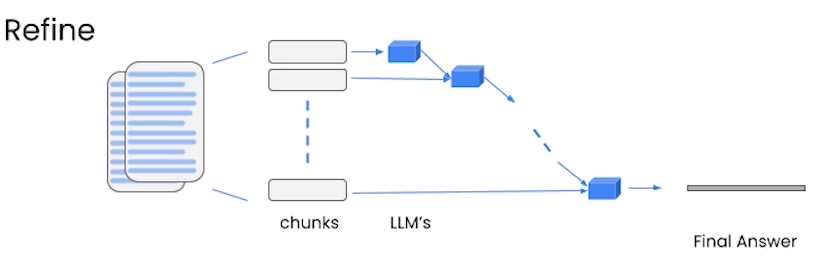

*[Image Source](https://ogre51.medium.com/types-of-chains-in-langchain-823c8878c2e9)*

RefineDocumentsChain is similar to map-reduce:

The refine documents chain constructs a response by looping over the input documents and iteratively updating its answer. For each document, it passes all non-document inputs, the current document, and the latest intermediate answer to an LLM chain to get a new answer.

This can be easily run with the chain_type="refine" specified.